# Hand Written Digit Recognition - TensorFlow Keras

## Import Necessary Packages

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## Load Your Data Set

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# We are downloading the digits data set which comes with keras.

## Some Basic Analysis

In [3]:
# Let's check the number of samples (number of images) in train data set.
len(x_train) 

60000

In [4]:
# Let's check the shape of first image (first element).
x_train[0].shape

# You would se that the shape of the image is 28,28. which means 28*28 pixels

(28, 28)

In [5]:
# This is how the first element of train data set looks in a 2-D array
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

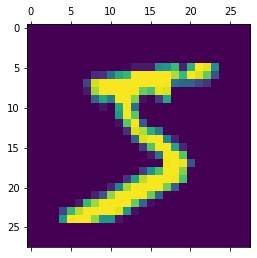

In [6]:
# This is the actual image of first element of train data set.
plt.matshow(x_train[0])
# Looks like it is number 5. We can cross check it in train data set first element

In [6]:
y_train[0]
# Yes! it is number 5.

5

Each image is stored in a two dimensional arrya and the number ranges from 0 to 255. 0 for pixles with extream white pixels and 255 for extream black pixels.
Below you could see a sample number representation of number '1'.
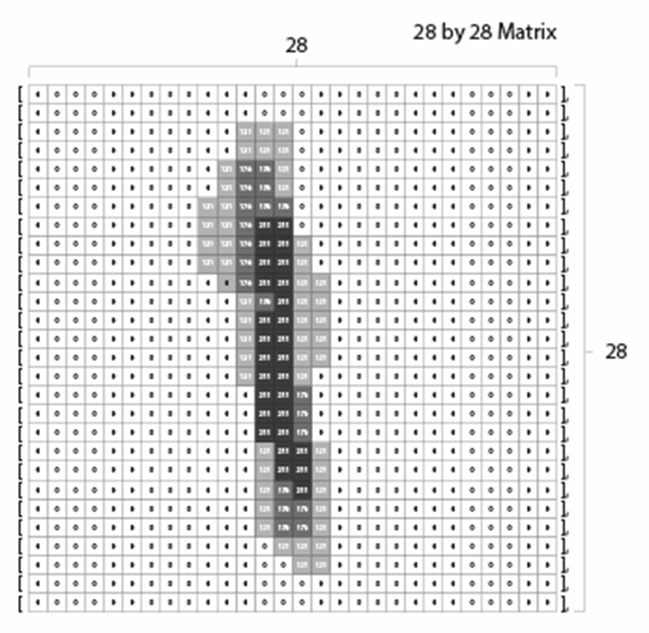


In [7]:
# let's check the number of samples in test data set.
len(y_test)

10000

## Reshape

#### Since elements in training data set is in 2-D Array, we need to convert (flatten) it into 1-D array.

In [11]:
# Current training data set shape.
x_train.shape
# it is a 2-D array of 28*28 with 6000 samples

(60000, 28, 28)

In [12]:
# Now, flatten the 2-D training dataset in 1-D array and store it in another variable
x_train_flat = x_train.reshape(len(x_train),28*28)

# Now, cheeck if has faltten or not
x_train_flat.shape

# We could have used 'normalizer' from sklearn to flatten 2-D Array into 1-D array(n samples, n features)

(60000, 784)

Great, it has flatten into 1-D array.

In [13]:
# Let's see, how it looks now
x_train_flat[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [14]:
# Now fatten the test data set as well.
x_test_flat = x_test.reshape(len(x_test),28*28)

# Now, cheeck if has faltten or not
x_test_flat.shape

(10000, 784)

Great! it has flatten as well.

In [15]:
x_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

## Buid Your First Simple NN Model 
### Steps Are - 

In [16]:
# 1. Define Your Model
# Sequential means we have stack of layers in our neural network.
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])


# 2. Compile your model
model.compile(
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'] 
)


# 3. Fit your model
model.fit(
    x_train_flat, y_train,
    validation_data=(x_test_flat,y_test),
    epochs=5
)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.1857 - accuracy: 0.3496 - val_loss: 1.6770 - val_accuracy: 0.5678
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 1.4272 - accuracy: 0.5236 - val_loss: 1.2587 - val_accuracy: 0.6205
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 1.2665 - accuracy: 0.6186 - val_loss: 1.1505 - val_accuracy: 0.6436
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 1.1882 - accuracy: 0.6434 - val_loss: 1.2457 - val_accuracy: 0.7139
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 1.1497 - accuracy: 0.7166 - val_loss: 1.2064 - val_accuracy: 0.6778


As we can see, training accuracy is quite low, we need to increase it, but how?

BTW, still the model is not over fitted.

## Model Improvement

The reason why we are getting low accuracy is that our values in train data set is not scaled. The values are distibuted between 0 to 255.

We need to scale it first. It would be good if we could bring all the values in to the range of 0 to 1.

### 1. Divide all values by max value (Scaling)

In [17]:
# Scale the test and train values even before Normalization
x_train = x_train/255
x_test = x_test/255

# Now, reshape the test and train data sets into 1-D arrya.
x_train_flat = x_train.reshape(len(x_train),28*28)
x_test_flat = x_test.reshape(len(x_test),28*28)

In [18]:
# Check if values have been scaled or not
x_train_flat[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [19]:
x_test_flat[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [20]:
# 1. Define Your Model
# Sequential means we have stack of layers in our neural network.
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])


# 2. Compile your model
model.compile(
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'] 
)


# 3. Fit your model
model.fit(
    x_train_flat, y_train,
    validation_data=(x_test_flat,y_test),
    epochs=5
)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4891 - accuracy: 0.8771 - val_loss: 0.3102 - val_accuracy: 0.9144
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3064 - accuracy: 0.9159 - val_loss: 0.2847 - val_accuracy: 0.9213
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2851 - accuracy: 0.9213 - val_loss: 0.2719 - val_accuracy: 0.9261
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2750 - accuracy: 0.9237 - val_loss: 0.2703 - val_accuracy: 0.9248
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2677 - accuracy: 0.9261 - val_loss: 0.2663 - val_accuracy: 0.9271


Nice! We achieved quite good testing and validation accuracy, but can we increase the accuracy even further.

### 2. Introduce mini batches and tune epochs

In [21]:
# 1. Define Your Model
# Sequential means we have stack of layers in our neural network.
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])


# 2. Compile your model
model.compile(
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'] 
)


# 3. Fit your model
model.fit(
    x_train_flat, y_train,
    validation_data=(x_test_flat,y_test),
    epochs=10,
    batch_size=32
)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4894 - accuracy: 0.8773 - val_loss: 0.3100 - val_accuracy: 0.9157
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3072 - accuracy: 0.9152 - val_loss: 0.2861 - val_accuracy: 0.9219
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2860 - accuracy: 0.9216 - val_loss: 0.2778 - val_accuracy: 0.9239
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2754 - accuracy: 0.9241 - val_loss: 0.2674 - val_accuracy: 0.9261
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2679 - accuracy: 0.9256 - val_loss: 0.2661 - val_accuracy: 0.9265
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2628 - accuracy: 0.9275 - val_loss: 0.2605 - val_accuracy: 0.9291
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2591 - accuracy: 0.9294 - val_loss: 0.2639 - val_accuracy:

Not a significant incresase in training and test data set. Try adding hidden layers.

### 3. Add Hidden layers

In [22]:
# 1. Define Your Model
# Sequential means we have stack of layers in our neural network.
model = keras.Sequential([
keras.layers.Dense(200, input_shape=(784,), activation='sigmoid'), 
keras.layers.Dense(100, input_shape=(784,), activation='sigmoid'),
keras.layers.Dense(60, input_shape=(784,), activation='sigmoid'),
keras.layers.Dense(30, input_shape=(784,), activation='sigmoid'),
keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

# 2. Compile your model
model.compile(
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'] 
)


# 3. Fit your model
model.fit(
    x_train_flat, y_train,
    validation_data=(x_test_flat,y_test),
    epochs=10,
    batch_size=32
)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8007 - accuracy: 0.7921 - val_loss: 0.2837 - val_accuracy: 0.9335
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2167 - accuracy: 0.9441 - val_loss: 0.1794 - val_accuracy: 0.9557
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1405 - accuracy: 0.9621 - val_loss: 0.1622 - val_accuracy: 0.9556
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1037 - accuracy: 0.9715 - val_loss: 0.1381 - val_accuracy: 0.9620
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0831 - accuracy: 0.9767 - val_loss: 0.1063 - val_accuracy: 0.9686
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0633 - accuracy: 0.9827 - val_loss: 0.1099 - val_accuracy: 0.9702
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0538 - accuracy: 0.9851 - val_loss: 0.0974 - val_accuracy:

Yeppiee..! Now that's waht is called accuracy. We have got a higher training and testing(validation) accuracy and still the model is not over fitted.

Now Let's visualize and cross check our prediction.

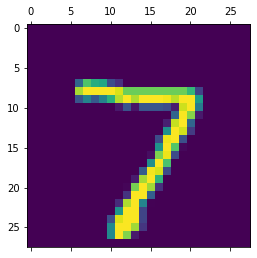

In [23]:
# The first test number 
plt.matshow(x_test[0])

In [24]:
y_predicted = model.predict(x_test_flat)
y_predicted[0]

array([1.2844128e-05, 9.7847351e-06, 1.0951728e-05, 2.2444416e-05,
       8.1263561e-06, 7.8932908e-06, 3.3662719e-08, 2.2294655e-01,
       3.9484183e-07, 1.1805689e-04], dtype=float32)

In [25]:
np.argmax(y_predicted[0])

7

Among all the possible 10 values the value with highest probability is on index 7, which means the predicted value is 7 and it's absolutedly correct. Tyr with some other index values as well.

### Now we can make a confusion matrix.

In [26]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

These are integer values but y_predicted are whole values and needs to be converted in to class values.

In [27]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

#### confusion matrix

In [28]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    2,    2,    1,    0,   13,    1,    2,    0],
       [   0, 1121,    5,    3,    0,    0,    0,    0,    6,    0],
       [   4,    1, 1013,    5,    3,    0,    1,    2,    3,    0],
       [   0,    0,    6,  987,    0,    4,    0,    4,    7,    2],
       [   0,    0,    4,    0,  966,    0,    5,    1,    1,    5],
       [   4,    0,    0,   16,    1,  852,   12,    0,    5,    2],
       [   2,    2,    4,    1,    2,    4,  943,    0,    0,    0],
       [   2,    5,   15,   10,    1,    0,    0,  981,    2,   12],
       [   2,    0,    6,    7,    1,    7,    3,    1,  944,    3],
       [   3,    2,    0,    5,   10,    7,    3,    4,   11,  964]])>

#### Now vizualize it

Text(69.0, 0.5, 'Actual')

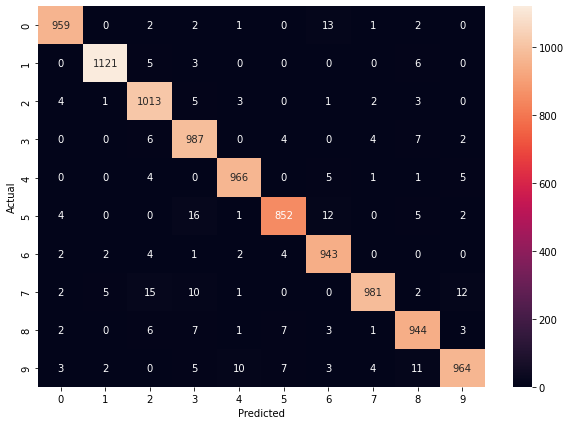

In [29]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [31]:
model.evaluate(x_test_flat,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1044 - accuracy: 0.9730


[0.1044485941529274, 0.9729999899864197]

We have achieved 97.39% of test/validation accuracy. 

## Additional

You can flatten the test data with in the keras framework.

In [32]:
# 1. Define Your Model
# Sequential means we have stack of layers in our neural network.
model = keras.Sequential([
keras.layers.Flatten(input_shape=(28,28)),
keras.layers.Dense(200, activation='sigmoid'), 
keras.layers.Dense(100, activation='sigmoid'),
keras.layers.Dense(60, activation='sigmoid'),
keras.layers.Dense(30, activation='sigmoid'),
keras.layers.Dense(10, activation='sigmoid')
])

# 2. Compile your model
model.compile(
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'] 
)


# 3. Fit your model
model.fit(
    x_train_flat, y_train,
    validation_data=(x_test_flat,y_test),
    epochs=10,
    batch_size=32
)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7768 - accuracy: 0.8078 - val_loss: 0.2697 - val_accuracy: 0.9333
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2026 - accuracy: 0.9482 - val_loss: 0.1648 - val_accuracy: 0.9564
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1337 - accuracy: 0.9643 - val_loss: 0.1417 - val_accuracy: 0.9607
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0990 - accuracy: 0.9730 - val_loss: 0.1176 - val_accuracy: 0.9660
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0774 - accuracy: 0.9789 - val_loss: 0.1078 - val_accuracy: 0.9696
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0629 - accuracy: 0.9823 - val_loss: 0.0936 - val_accuracy: 0.9732
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0510 - accuracy: 0.9857 - val_loss: 0.0939 - val_accuracy:

### Exercise
Try using different optimizers,loss and activation functions. go through keras documentations.